# $\color{purple}{\text{Social Cliques in the Deep South: Three Approaches}}$

____

__By Alexander Ng & Philip Tanofsky__

**Data 620 Web Analytics**

**Submitted March 13, 2022**

____

We review from a network centric perspective the analysis of cliques of women in a Deep South small city in the 1930s.   This pioneering 1941 study by Allison Davis, Burleigh Gardner and Mary Gardner describes these interactions of 18 white women at 14 social events in Chapter 7 of *"Deep South: A Social Anthropological Study of Caste and Class"*.

We approach the study in three ways:  

First, we review the primary source material in social anthropology.  In any data science study, we believe a mastery of the subject domain is essential to extract meaningful insights from quantitative models.  Davis and his coauthors discuss the class system and bring important insights to interpreting the women's cliques and extended groups. 

Second, we apply a linear algebraic approach to the data.  After all, the associations are defined as a matrix.  Using principal components analysis, we confirm the authors' qualitative findings and provide a quantitative interpretation of their qualitative findings.

Third, we analyze the network graph theoretical properties of the data set.  Looking at centrality measures and other graph statistics, we compare and contrast the two quantitative approaches using the Davis results as our ground truth.

We conclude with some remarks on the role of this dataset in Data Science.
____

# $\color{blue}{\text{Part One:  Social Anthropology Approach}}$

## Background

Allison Davis and his coauthors approached the study of race and class relations within a small Deep South City of 10,000 from a social anthropology perspective.  
Their study was published in 1941 while the women's clique dataset was collected in 1936.   This dates to the time of the Great Depression and the early years of World War II.   While the study did not reveal the identities of the town or state, reviewers are stated that the setting for *Deep South* was __Natchez, Mississippi__, the former center of cotton agriculture and slave trade.

Allison Davis was the first black tenured professor at a predominantly white university, University of Chicago.  This pioneering research helped support the NAACP's legal case in Brown vs. Board of Education that overturned racial segregation in public schools in 1954.  

(https://en.wikipedia.org/wiki/Brown_v._Board_of_Education)

(https://dialogo.uchicago.edu/content/honoring-legacy-allison-davis-may-11-2020)

## Clique Data

The women's clique data comes from *Chapter 7 - Social Cliques In The White Society*.  Figure 3 contains the same dataset used in this assignment but with most of the background context stripped out.   It can be found in page 148 and is reproduced below.  A couple of notes:

*  the table states the events took place from Feb 23 to Nov 21 of 2022.  The text informs us that events and participations were reported in a newspaper referred to as the *Old City Herald*.

*  there are are 2 groups of women in the upper half and lower half of the first column based on their participation in events.  The events and women have been arranged to make groups visible.  Visually, I estimate participants 1 (Evelyn Jefferson) to 7 (Eleanor Nye) form a group while participants 10 (Verne Sanderson) to 18 (Flora Price) for a second group.



![Figure 3](figure3.png)

___






Davis, et. al. categorize the women in Figure 3 into three types:  

*  __core__ members "those who participate together most often and at the most intimate affairs"

*  __primary__ members "those who participate with core members on some oaccasions but never as a group by themselves alone".

*  __secondary__ members "individual on the fringes who participate only infrequently"

Figure 5 reports the cliques and other membership types of each individual based on the authors' opinion formed by their field work and qualitative analysis.

![Figure 5](figure5.png)


So the key findings are:

*  $\color{green}{\text{Clique 1 contains 4 core members:}}$

   +  1.  Evelyn Jefferson
   +  2.  Laura Mandeville
   +  3.  Theresa Anderson
   +  4.  Brenda Rogers

*  $\color{brown}{\text{Clique 1 contains 3 primary members:}}$

   + 5.  Charlotte McDowd
   + 6.  Frances Anderson
   + 7.  Eleanor Nye

*  $\color{orange}{\text{Clique 1 contains 3 secondary members:}}$

   + 8.  Pearl Oglethorpe
   + 9.  Ruth DeSand
   + 10.  Verne Sanderson

*  Only Ruth DeSand (#9) was claimed by both Cliques as a member.   Pearl Oglethorpe was claimed by Clique 1 but "on the fringes" while Verne Sanderson (#10) was claimed by Clique II.  The marginality of 8-10 was established by interviews with other participants.

*  $\color{green}{\text{Clique 2 contains 3 core members:}}$

   +  13. Sylvia Avondale
   +  14. Nora Fayette
   +  15. Helen Lloyd

*  $\color{brown}{\text{Clique 2 contains 2 primary members:}}$

   +  11. Myra Liddell
   +  12. Katherine Rogers

*  $\color{orange}{\text{Clique 2 contains 5 secondary members - 2 of whom are shared with Clique 1:}}$

   +  9.  Ruth DeSand
   +  10.  Verne Sanderson
   +  11.  Dorothy Murchison
   +  12.  Olivia Carleton
   +  13.  Flora Price

___



# $\color{blue}{\text{Part Two: The Linear Algebraic Approach}}$



We obtain the data from networkx via the `davis_southern_women_graph`.  In order to align the data row-wise consistent with the UCI dataset at (http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat)  we extract and reorder the women and the events as given therein.

In [328]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import networkx.algorithms.bipartite as bipartite
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [329]:
G = nx.davis_southern_women_graph()
women, events = nx.bipartite.sets(G)

In [330]:
w = sorted(list(women))
w

['Brenda Rogers',
 'Charlotte McDowd',
 'Dorothy Murchison',
 'Eleanor Nye',
 'Evelyn Jefferson',
 'Flora Price',
 'Frances Anderson',
 'Helen Lloyd',
 'Katherina Rogers',
 'Laura Mandeville',
 'Myra Liddel',
 'Nora Fayette',
 'Olivia Carleton',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Sylvia Avondale',
 'Theresa Anderson',
 'Verne Sanderson']

In [331]:
women_sorted = [ w[4], w[9] , w[16], w[ 0], w[1], w[6] , w[3], w[13 ], w[14] , w[17], w[10], w[8] ,
                w[15] , w[11], w[7] , w[2], w[12] , w[5] ]

In [332]:
events_sorted = sorted(list(events))
new_order = [ 0, 6, 7 , 8, 9, 10, 11, 12, 13, 1, 2, 3, 4, 5 ]
events_sorted = [ events_sorted[i] for i in new_order ]

In [333]:
A= nx.bipartite.matrix.biadjacency_matrix( G, women_sorted, events_sorted ).todense()
A.shape

(18, 14)

We display the resulting bipartite biadjacency matrix below with the desired row and column orders.   The matrix size is 18 rows by 14 columns.   We retain the row and column labels.
Note that the biadjacency matrix is identical to Figure 3 in the previous section from the monograph *Deep South*.


In [334]:
df_adjacency = pd.DataFrame( A, index = women_sorted, columns = events_sorted )
df_adjacency

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14
Evelyn Jefferson,1,1,1,1,1,1,0,1,1,0,0,0,0,0
Laura Mandeville,1,1,1,0,1,1,1,1,0,0,0,0,0,0
Theresa Anderson,0,1,1,1,1,1,1,1,1,0,0,0,0,0
Brenda Rogers,1,0,1,1,1,1,1,1,0,0,0,0,0,0
Charlotte McDowd,0,0,1,1,1,0,1,0,0,0,0,0,0,0
Frances Anderson,0,0,1,0,1,1,0,1,0,0,0,0,0,0
Eleanor Nye,0,0,0,0,1,1,1,1,0,0,0,0,0,0
Pearl Oglethorpe,0,0,0,0,0,1,0,1,1,0,0,0,0,0
Ruth DeSand,0,0,0,0,1,0,1,1,1,0,0,0,0,0
Verne Sanderson,0,0,0,0,0,0,1,1,1,0,0,1,0,0


It is useful to export the adjacency matrix for future use.

In [335]:
df_adjacency.to_csv('df_adjacency.csv')

In [336]:
# Label map just uses the node id as the label for both women and events.
#label_map = {}

#label_map.update( (v[0], v[0]) for v in G.nodes(data=True) )

# Principal Components Analysis of the Cliques

Since our goal is to identify clusters of women or events, a better tool is PCA analysis 
which computes the $k$ most important factors that explain the observed variance of events.

*  Each row of the bi-adjacency matrix $B$ represents a woman. 
*  Each column represents an event.

The first and second PCA vectors will help to identify clusters of related samples (i.e. women).

First we report key findings of the PCA analysis and then compare the quantitative approach to the original cliques reported by Davis, et. al based on domain expertise using qualitative methods only.


*  The first 2 PCA components explain 56% of the total variance.
*  The PCA analysis scatterplot does a very good job of replicating the structural organization of the cliques and their subgroupings.
*  There is a small difference in how Clique 2 is reported.  It could be the quantitative analysis is superior to the qualitative approach.


## Running PCA

In the code below, we standardize the bi-adjacency matrix $B$.  This means the columns of $B$ are set to mean 0 and variance 1 column vectors.   Then we compute the first 2 PCA components and obtain and plot the values on a labeled scatterplot.   

In [337]:
from sklearn.preprocessing import StandardScaler

z_adjacency = StandardScaler().fit_transform(df_adjacency)

pca = PCA( n_components = 2 )

principalComponents = pca.fit_transform( z_adjacency )

principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['PCA1', 'PCA2' ] , index = women_sorted )


In [338]:
principalDf

,PCA1,PCA2
Evelyn Jefferson,3.535414,-1.014594
Laura Mandeville,3.439877,-1.389351
Theresa Anderson,2.929587,-0.994310
Brenda Rogers,3.409032,-1.180129
Charlotte McDowd,1.913849,0.453585
Frances Anderson,1.857951,0.432444
Eleanor Nye,1.231137,0.230217
Pearl Oglethorpe,-0.094715,1.244837
Ruth DeSand,0.272041,0.844877
Verne Sanderson,-1.154558,0.467180


## Explained Variance

The calculation below shows that the first 2 PCA components explained 40% and 16.4% of the variance respectively.  Thus, the 2 components explain 56.4% of the variance.

In [339]:
pca.explained_variance_ratio_

array([0.40058733, 0.16388939])

## Visualization of PCA Components

The seaborn scatterplot below shows the factor loadings of the first two PCA factors.  Each point represents the coordinates along PCA1 and PCA2 of each women.   We label each point with the name.
Since the PCA1 explains the most variance in the matrix $B$, that has primary importance.

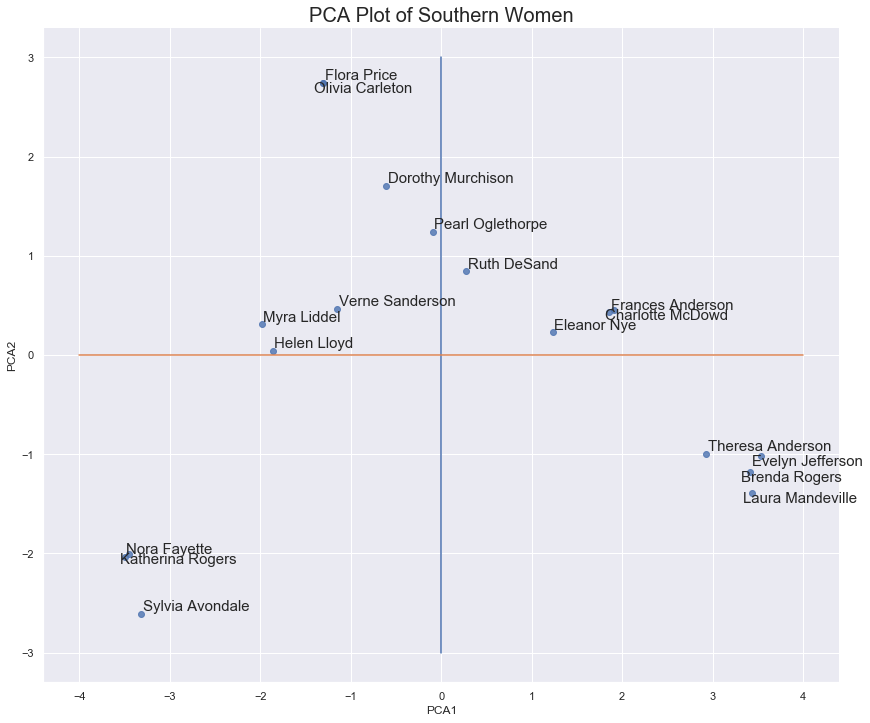

In [343]:
import seaborn as sns
sns.set_theme()
ax = sns.lmplot( 'PCA1', # Horizontal axis 
                'PCA2' , # Vertical 
                data = principalDf ,
                fit_reg = False , # no regression line
                size = 10,
                aspect = 1.2 ) # size and dimension
plt.title("PCA Plot of Southern Women", fontsize = 20)
plt.xlabel( 'PCA1')
plt.ylabel( 'PCA2')

# Seaborn needs a decent package to do text label repeling.
# Shouldn't have to do this manual nonsense.

for i, point in principalDf.iterrows():
    if( 'McDowd' in i ) or ( 'Rogers' in i ) or ('Carleton' in i) or ('Jefferson' in i ) or ('Mandeville' in i):
        x_shift = -0.1
        y_shift = -0.1
    else:
        x_shift = 0.02
        y_shift = 0.03
    plt.gca().text( point['PCA1'] + x_shift , point['PCA2'] + y_shift , i , fontsize = 15)

plt.plot([0,0], [-3,3] )
plt.plot([-4,4 ], [0, 0 ] )

## Translating PCA Clusters to Cliques

The results of PCA analysis are strikingly accurate.   Using the context from the previous section, we conclude that:

*  *PCA1 axis* distinguishes Clique 1 vs 2 alignment.  Large positive X-axis coordinate means closeness to Clique 1. 

   +  The bottom right cluster in Quadrant 4 perfectly captures the core members of Clique 1 (Evelyn Jefferson, etc.)
   

*  Negative X-coordinate (of large absolute value) means closeness to Clique 2.
  
   +  The bottom left cluster in Quadrant 3 captures 2 of 3 core members of Clique 2.  However, Katherine Rogers (a primary member) is grouped close to Nora Fayette (a core Clique 2 member).  This suggests a difference from the social anthropology approach and merits more study.
            
*  *PCA2 axis* seems to measure marginality of members.  A larger positive value on the Y-axis means a member is more on the fringes - attends fewer events.
    
   +  Flora Price, Olive Carleton only go to 2 events.  They are the most fringe.
   
   +  All secondary members are above the X-axis.  Most core members are below the X-axis.
    
*  The points on the right hand side (Quadrants 1 and 4) appear the most densely grouped around the X-axis.  This suggest that Clique 1 is more disciplined.  Primary and secondary members observe attendance more closely than do Clique 2 membership.



_____

# $\color{blue}{\text{Approach Three:  Graph Network Centrality and Statistics}}$

# Plotting the Women-Event Graph

The women-event relationships form a bipartite graph.   To layout the graph in an easy to visualize format, we arrange the women on the left side and the events on the right side.

We need to assign coordinates to the positions of each node.  We also align them show the events and women occupy equal height.

In [341]:

scale_factor = len(women_sorted)/len(events_sorted)

pos = {}

# Update position for node from each group
pos.update((node, (5, -index)) for index, node in enumerate(women_sorted))
pos.update((node, (8, -index * scale_factor)) for index, node in enumerate(events_sorted))
#G.nodes(data=True)


label_shift = 0.1
pos_label = {}
pos_label.update((node, ( 5 - label_shift, -index)) for index, node in enumerate(women_sorted))
pos_label.update((node, ( 8 + label_shift, -index * scale_factor)) for index, node in enumerate(events_sorted))

# Label map just uses the node id as the label for both women and events.
label_map = {}

label_map.update( (v[0], v[0]) for v in G.nodes(data=True) )


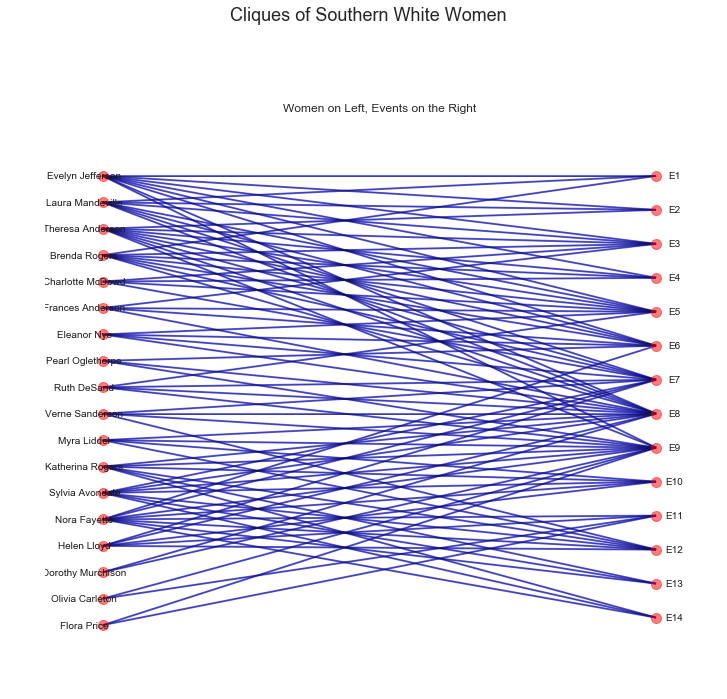

In [344]:
plt.figure(figsize = (12, 10))
plt.tight_layout()
plt.axis("off")




plt.suptitle("Cliques of Southern White Women", y = 1.05 ,fontsize= 18)

plt.title("""
Women on Left, Events on the Right
""", fontsize=12)

nx.draw_networkx_labels(G, 
                        pos = pos_label , 
                        labels = label_map , font_size = 10)

nx.draw_networkx_edges(G, pos = pos, 
                       width = 2, 
                       edge_color = 'blue', 
                       alpha = 0.6 )

nx.draw(G, pos = pos ,   
        with_labels = False ,
        alpha = 0.5 ,
        node_size = 100, 
        node_color = "red")


While the above  visualization confirms the graph is bipartite, it does not help us in identify cliques.  We clearly see variation in the number of attendees at events.   So events E7, E8, E9 are well attended. 

## Network Centrality and Graph Statistics

$\color{red}{\text{Phil - add more content here.}}$

In [349]:
# various code + work

# $\color{blue}{\text{Conclusion}}$

We have completed a study of cliques based on a famous dataset associated with a pioneering social anthropological study.
The study suggests that cliques exist in social circles.   Extended groups of friendship around core clique members also exist.  Quantitative measures can enhance and supplement qualitative studies.

While this dataset is over 80 years old, it still resonates today for various reasons.

*  First, the collection and use of network clique data was considered too technical by reviewers when *Deep South* was originally published.  Today it is a standard dataset included in multiple Python and R software packages.  Unfortunately, some data science website publish an inaccurate version of the dataset.  This is shameful to our profession.

*  Second, the study counters the pessimistic view that data science is used solely for profit or selfish intentions.  This study directly contributed to the elimination of racial segregation in all US public schools in the 1954 Brown vs. Board of Education Supreme Court decision.

*  Third, the data set was collected under false pretense as explained by Jennifer Jensen Wallach in a later 2009 edition.   The researcher told Natchez, Mississippi residents that the project was to study former slaves - not Jim Crow era social behavior.   Later generations of social scientists perceived this pretense as immoral.   

In the past, data scientists (or their predecessors) have risked life and limb to complete their work.  Alas, history has a way of repeating.

